[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/caer200/ocelotml_2d/blob/main/eval.ipynb)

# Install the required packages

In [1]:
!pip install rdkit
!pip install dgl
!pip install dgllife
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 13.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 32.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.1/226.1 kB 5.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=ce9a1fd4052fe542d51dd722a6a78adab8371a27aa605406d041356b6c240e34
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


# Make predictions with pre-trained models



In [2]:
!git clone https://github.com/caer200/ocelotml_2d.git

Cloning into 'ocelotml_2d'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 115 (delta 28), reused 1 (delta 1), pack-reused 68
Receiving objects: 100% (115/115), 59.29 KiB | 14.82 MiB/s, done.
Resolving deltas: 100% (62/62), done.


In [3]:
# load the helper functions
from ocelotml_2d.ocelotml import * 

def mlpredict(smiles, model_name):
    prediction = make_prediction_with_smiles(smiles, model_name)
    return prediction

DGL backend not selected or invalid.  Assuming PyTorch for now.


Setting the default backend to "pytorch". You can change it in the ~/.dgl/config.json file or export the DGLBACKEND environment variable.  Valid options are: pytorch, mxnet, tensorflow (all lowercase)


All trained ML models are available on Materials Data Facility. Follow [this link](https://doi.org/10.18126/3ilu-3f69 ) access the files. 

In [6]:
import wget
import os

# functions to donwload the trained ML model and hyperparmeter
def get_model(model_name):
  os.system("rm -f params*json")
  os.system("rm -f best_r2*.pt")
  wget.download("https://data.materialsdatafacility.org/mdf_open/ocelotml_2d_v1.2/{}/params.json".format(model_name))
  wget.download("https://data.materialsdatafacility.org/mdf_open/ocelotml_2d_v1.2/{}/best_r2.pt".format(model_name))
  if "_evi" in model_name:
      wget.download("https://data.materialsdatafacility.org/mdf_open/ocelotml_2d_v1.2/{}/params_std.json".format(model_name))



The nomenclature of the models is ***property_generation_subtype***. 



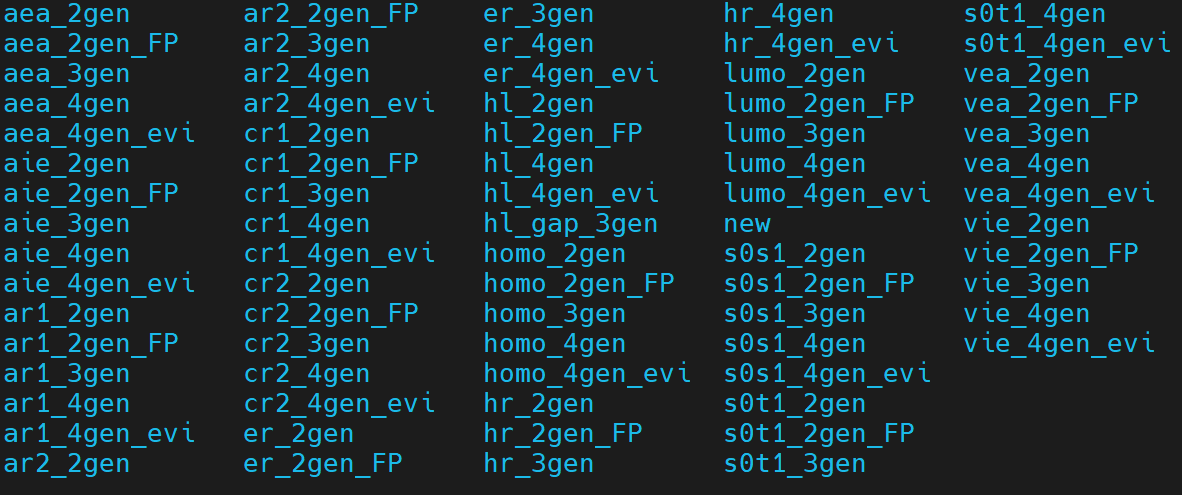

For example, prediction of homo with fourth generation model + uncertainity use  ***homo_4gen_evi***

In case of models with uncertainity, first value is the prediction and the second value is the uncertainity

Edit the code below to test on different molecules. SMILES can be generated [here](https://pubchem.ncbi.nlm.nih.gov//edit3/index.html).


In [8]:
smiles = "c1ccccc1"
model_name = "homo_4gen_evi"
get_model(model_name)
mlpredict(smiles=smiles, model_name=model_name)

[-7.796, 1.005]